In [1]:
from multi_path_base import *
#%matplotlib tk 
import os
import datetime as dtM
os.chdir('/Users/alhaddwt/Waleed Dropbox/Waleed Al-Haddad/GitLab/wind-power/python_code')
forecast_with_data=np.load('forecast_with_data.npy')
cwd = os.getcwd()
os.chdir(cwd+'/CI_FIG')
print('path changed to ' + cwd+'/CI_FIG')

path changed to /Users/alhaddwt/Waleed Dropbox/Waleed Al-Haddad/GitLab/wind-power/python_code/CI_FIG


In [2]:
#cleaning data
interp_points=1
forecast_data_inter= np.zeros((3,1217, interp_points*72 ))
x = np.arange(1,72+1,1)
xnew = np.arange(1,72+1,1/interp_points)
counter=0
i=0;j=0
while j< forecast_with_data.shape[0]:
    if  sum(1*np.isnan(forecast_with_data[j,:,1]))==0 and \
        sum(1*np.isnan(forecast_with_data[j,:,2]))==0 and \
        np.max(forecast_with_data[j,:,1])<=1 and \
        np.min(forecast_with_data[j,:,1])>=0 and \
        np.max(forecast_with_data[j,:,2])<=1 and \
        np.min(forecast_with_data[j,:,2])>=0:
        
        #tck_forecast = interpolate.splrep(x, forecast_with_data[j,:,1], s=0)
        #tck_data = interpolate.splrep(x, forecast_with_data[j,:,2], s=0)
        #forecast_data_inter[0,i,:]= interpolate.splev(xnew, tck_forecast, der=0)
        #forecast_data_inter[1,i,:]= interpolate.splev(xnew, tck_data, der=0)
        forecast_data_inter[0,i,:]= forecast_with_data[j,:,1]
        forecast_data_inter[1,i,:]= forecast_with_data[j,:,2]
        forecast_data_inter[2,i,:]= forecast_with_data[j,:,0]
        i+=1
    j+=1

In [3]:
N=73
q975=np.zeros((N))
q025=np.zeros((N))
q95=np.zeros((N))
q05=np.zeros((N))
q50=np.zeros((N))
q75=np.zeros((N))
q25=np.zeros((N))

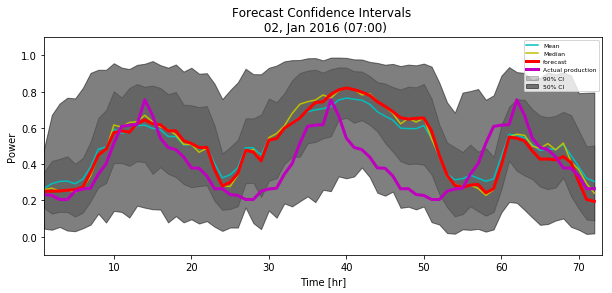

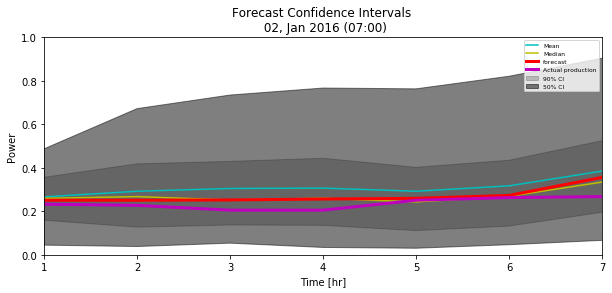

In [4]:
#%%capture
for k in range(0,1): #1217
    interpolation_points=72 #changed from 72 to account for intialization
    x = np.arange(1,73,1) #data start from hour 1 

    y = forecast_data_inter[0,k,:]   #forecast
    tck = interpolate.splrep(x, y, s=0) #set up interpolation object to extrapolate 

    xnew=np.arange(0,73)
    p_inter = interpolate.splev(xnew, tck, der=0) #extrapolate to hour zero
    p=p_inter

    N=len(p_inter)
    dt=1
    M_test=200
    real_1 = real(12.3, 2.2)
    #real_1 = real(0.15878588, 1.40043092) 
    #real_1 = real(1e-1,1e-5) 

    disct_temp = disct(N,dt,M_test)
    normal_X_derivative_tracking_Euler = np.empty((M_test,len(p_inter)));
    #normal_X_derivative_tracking_Euler= gen_X_normal_euler_derivative_tracking(X0=p_inter[0], disct=disct_temp,real=real_1, forecast=p_inter );
    normal_X_derivative_tracking_Euler, X_zero_drift, theta_list= gen_X_normal_euler_DT_modified(X0=p_inter[0], disct=disct_temp,real=real_1, forecast=p_inter );

    for i in range(0,73):
        q975[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.975)
        q025[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.025)

        q95[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.95)
        q05[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.05)

        q50[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.5)

        q75[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.75)
        q25[i]=np.quantile(normal_X_derivative_tracking_Euler[:,i], 0.25)
    
        
    fig = plt.figure(1,figsize=(10, 4))
    fig.clf()

    plt.xlim(1, 73)
    plt.ylim(-0.1, 1.1)

    #plt.plot(xnew,q975,'b-')
    #plt.plot(xnew,q025,'b-')

    #plt.plot(xnew,q95,'k-')
    #plt.plot(xnew,q05,'k-')

    plt.fill_between(xnew, q75,q25,color='k',alpha=0.2, label='90% CI')
    plt.fill_between(xnew, q95,q05,color='k',alpha=0.5, label='50% CI')

    #plt.plot(xnew,q75,'k-')
    #plt.plot(xnew,q25,'k-')

    plt.plot(xnew,np.mean(normal_X_derivative_tracking_Euler, axis=0),'c-', label='Mean')

    plt.plot(xnew,q50,'y-', label='Median')
    dt_object = dtM.datetime.fromtimestamp(forecast_data_inter[2,k,0])
    plt.plot(xnew,p, 'r-', label='forecast',linewidth=3)
    plt.plot(x,forecast_data_inter[1,k,:] , 'm-', label='Actual production',linewidth=3)
    plt.title('Forecast Confidence Intervals \n {:%d, %b %Y (%H:%M)}'.format(dt_object))#,fontsize=24

    plt.xlabel('Time [hr]')
    plt.ylabel('Power')
    plt.legend( prop={'size': 6})
    plt.savefig('72hr_forecast_CI_'+ str(k)+'.pdf')
    
    #plt.plot(X[0,:])
    fig = plt.figure(2,figsize=(10, 4))
    fig.clf()

    plt.xlim(1, 73)
    plt.ylim(-0.1, 1.1)

    #plt.plot(xnew,q975,'b-')
    #plt.plot(xnew,q025,'b-')

    #plt.plot(xnew,q95,'k-')
    #plt.plot(xnew,q05,'k-')

    plt.fill_between(xnew, q75,q25,color='k',alpha=0.2, label='90% CI')
    plt.fill_between(xnew, q95,q05,color='k',alpha=0.5, label='50% CI')

    #plt.plot(xnew,q75,'k-')
    #plt.plot(xnew,q25,'k-')

    plt.plot(xnew,np.mean(normal_X_derivative_tracking_Euler, axis=0),'c-', label='Mean')

    plt.plot(xnew,q50,'y-', label='Median')

    plt.plot(xnew,p, 'r-', label='forecast',linewidth=3)
    plt.plot(x,forecast_data_inter[1,k,:] , 'm-', label='Actual production',linewidth=3)

    plt.title('Forecast Confidence Intervals \n {:%d, %b %Y (%H:%M)}'.format(dt_object)) #,fontsize=10
    plt.xlabel('Time [hr]')
    plt.ylabel('Power')
    plt.legend( prop={'size': 6})
    plt.xlim(1, 7)
    plt.ylim(0, 1)
    plt.savefig('6hr_forecast_CI_'+ str(k)+'.pdf')
    

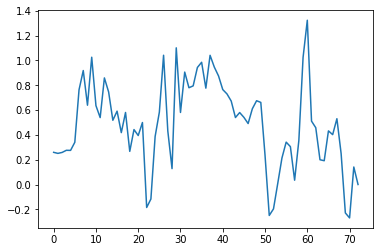

In [8]:
plt.plot(X_zero_drift)

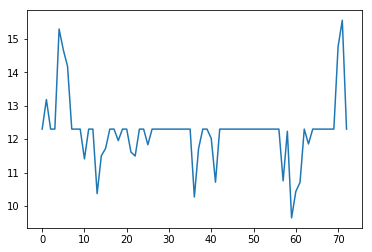

In [6]:
plt.plot(theta_list[:73])

In [139]:
delta=0.1
factr=1.5;
theta=12.3;
X_zero_drift_raw= p[1:] + np.diff(p)*72/theta
theta_array=np.ones(73)*theta
for i in range(0,72):
    if X_zero_drift_raw[i] < delta:
        g= (delta - X_zero_drift_raw[i] )
        f=  -1*factr*g*np.log(min(p[i], 1-p[i])) +1
        theta_array[i+1] = theta_array[i+1]*f
        #print('zero: ', f)
    if X_zero_drift_raw[i] > 1 - delta :
        g= ((1-delta) - X_zero_drift_raw[i]  )
        f=  -1*factr*g*np.log(min(p[i], 1-p[i])) +1
        theta_array[i+1] = theta_array[i+1]*f

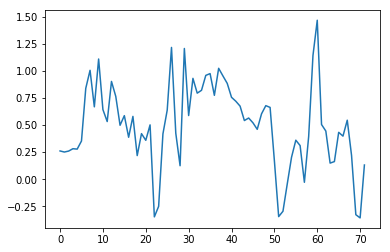

In [140]:
theta=12.3;
X_zero_drift_raw= p[1:] + np.diff(p)*72/theta
plt.plot(X_zero_drift_raw)

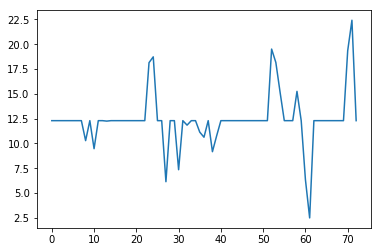

In [141]:
plt.plot(theta_array)

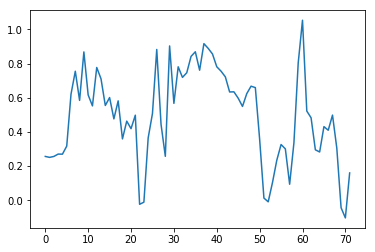

In [142]:
X_zero_drift_fixed= p[1:] + np.diff(p)*72/(theta_array[i])
plt.plot(X_zero_drift_fixed)

In [143]:
max(X_zero_drift_fixed)

1.053508313293859

In [144]:
min(X_zero_drift_fixed)

-0.10350366694300586